# Proceso de reduccion de dimensiones: PAC 

In [3]:
import pandas as pd
import mglearn
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import axes3d
from sklearn.preprocessing import scale 

%matplotlib inline
plt.style.use('ggplot')

En esta parte vamos a realizar el analisis de componentes principales(PCA) en el conjunto de datos `HTRU2_`

In [4]:
data = pd.read_csv('HTRU_2.csv', 
                   header = None, 
                   names = ['MeanIntegratedProfile',
                            'StdIntegratedProfile',
                            'ExcessKurtosisIntegratedProfile',
                            'SkewnessIntegratedProfile',
                            'ManDMSNRCurve',
                            'StdDMSNRCurve',
                            'ExcessKurtosisDMSNRCurve',
                            'SkewnessDMSNRCurve',
                            'Class'])

data.head()

,MeanIntegratedProfile,StdIntegratedProfile,ExcessKurtosisIntegratedProfile,SkewnessIntegratedProfile,ManDMSNRCurve,StdDMSNRCurve,ExcessKurtosisDMSNRCurve,SkewnessDMSNRCurve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Empecemos por dar una rápida mirada al valor medio de cada columna:

In [5]:
y = data['Class']
data = data.drop(['Class'], axis = 'columns')

In [6]:
X_norm = scale(data)
pca = PCA().fit(X_norm)

In [7]:
PVE = pca.explained_variance_ratio_

print('Proporción de varianza explicada (PVE) por cada componente principal:')
print(PVE)

Proporción de varianza explicada (PVE) por cada componente principal:
[0.51675584 0.26807564 0.10116862 0.0571781  0.03227836 0.01998491
 0.00255524 0.00200328]


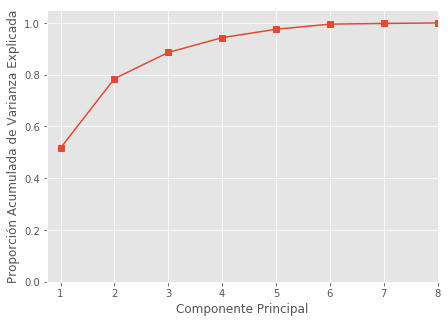

In [8]:
plt.figure(figsize = (7, 5))
plt.plot([1, 2, 3, 4, 5, 6, 7, 8], np.cumsum(pca.explained_variance_ratio_), '-s')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.xlabel('Componente Principal')
plt.xlim(0.75, 4.25)
plt.ylim(0, 1.05)
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8])
plt.show()

In [9]:
pca_loadings = pca.components_
print(pca_loadings)

[[-0.35966215 -0.21234796  0.41613654  0.40148661  0.34562563  0.38632121
  -0.3702155  -0.2922836 ]
 [-0.36188489 -0.4302135   0.31813967  0.30577008 -0.24791766 -0.31722697
   0.41102233  0.39775872]
 [-0.01325276  0.4364344   0.09173293  0.08346561  0.57038435  0.23420002
   0.27334335  0.5822915 ]
 [-0.29225602  0.75678826  0.30304693  0.17789768 -0.33242329 -0.25773213
  -0.03798298 -0.19999783]
 [ 0.74434976  0.01895864  0.14615196  0.6436107  -0.07333901 -0.06594445
   0.00344466 -0.0158027 ]
 [-0.01841197 -0.04607132 -0.05228488  0.02074329  0.60719734 -0.75165549
  -0.01531573 -0.24589691]
 [-0.31459003  0.06416928 -0.77303907  0.53965092 -0.02631342  0.06107319
   0.05065127 -0.03339184]
 [-0.02703314 -0.00464184 -0.06067659  0.02847703 -0.09206839 -0.23618403
  -0.78423838  0.56166337]]


In [63]:
# Importancia de las caracteristicas en base a los 3 primeros componentes
pca_principal_loading = np.absolute(pca_loadings[:3]).T
pve_transpose = PVE.reshape(8,1)[:3]
pca_feature_importances = np.matmul(pca_principal_loading, pve_transpose)

(8, 3)


(3, 1)


(8, 1)


[[0.35966215 0.36188489 0.01325276]
 [0.21234796 0.4302135  0.4364344 ]
 [0.41613654 0.31813967 0.09173293]
 [0.40148661 0.30577008 0.08346561]
 [0.34562563 0.24791766 0.57038435]
 [0.38632121 0.31722697 0.23420002]
 [0.3702155  0.41102233 0.27334335]
 [0.2922836  0.39775872 0.5822915 ]]


[[0.51675584]
 [0.26807564]
 [0.10116862]]


[[0.2842108 ]
 [0.26921527]
 [0.30960697]
 [0.29788416]
 [0.30276975]
 [0.30836825]
 [0.32914986]
 [0.31657831]]




Text(0, 0.5, 'PCA 2')

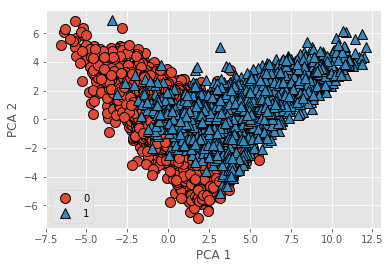

In [105]:
transformada = pca.transform(X_norm)
mglearn.discrete_scatter(transformada[:,0], transformada[:,1], y)
plt.legend(y.unique(), loc = 'best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')